In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data with a linear relationship + noise
def gen_data(n, m, c, randomness):
    x = np.random.uniform(-10, 10, size=n)
    r = np.random.uniform(-10, 10, size=n)
    y = (m * x + c) * (1 - randomness) + r * randomness
    return np.array([x, y]).T

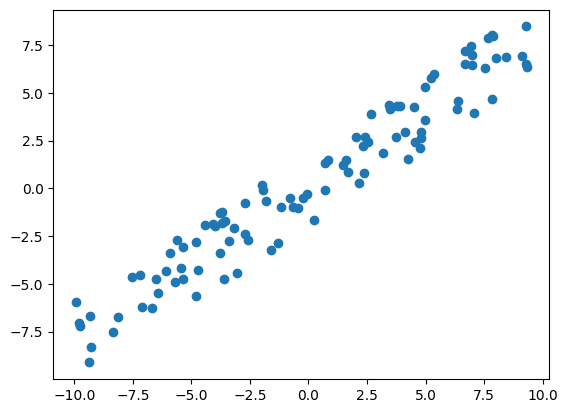

In [3]:
data = gen_data(100, 1, 0, 0.2)

plt.scatter(data[:,0], data[:,1])

In [4]:
# Try to fit a straight line `y = ax + b` to the dataset
# We will do this my minimising the MSE using gradient descent

# Predict the y value for a given x, according to the model
def predict(a, b, x):
    return a * x + b

# Mean square error of the model to the data
def mse(a, b, data):
    X = data[:,0]
    Y_predict = predict(a, b, X)
    Y = data[:,1]
    return np.mean((Y - Y_predict) ** 2)

# Derivative of MSE with respect to a
def mse_da(a, b, data):
    X = data[:,0]
    Y_predict = predict(a, b, X)
    Y = data[:,1]
    return -2 * np.mean(X * (Y - Y_predict))

# Derivative of MSE with respect to b
def mse_db(a, b, data):
    X = data[:,0]
    Y_predict = predict(a, b, X)
    Y = data[:,1]
    return -2 * np.mean(Y - Y_predict)

In [5]:
# https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept
def abline(slope, intercept, alpha=1):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    # x_vals = np.array(axes.get_xlim())
    x_vals = np.array([-10, 10])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, alpha=alpha)

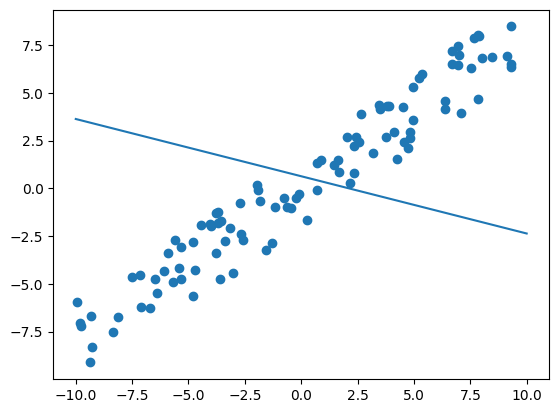

In [14]:
# Initialize the model with random parameters
A, B = np.random.uniform(low=-1, high=1, size=2)

plt.scatter(data[:,0], data[:,1])
abline(A, B)

In [15]:
learning_rate = 0.01
max_steps = 100
min_change = 0.001

As = []
Bs = []
loss_vals = []

last_loss = np.inf
for i in range(max_steps):
    err = mse(A, B, data)
    if np.abs(err - last_loss) < min_change:
        break
    loss_vals.append(err)

    A -= mse_da(A, B, data) * learning_rate
    B -= mse_db(A, B, data) * learning_rate

    As.append(A)
    Bs.append(B)

    last_loss = err

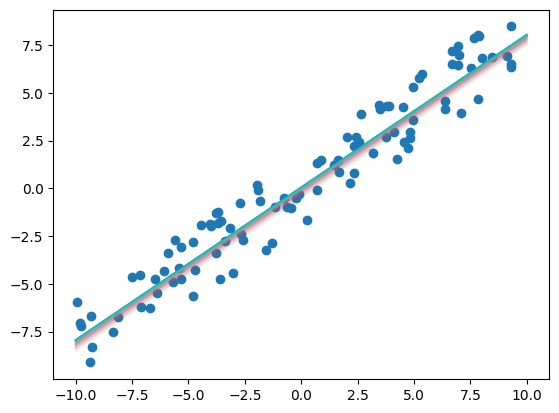

In [8]:
plt.scatter(data[:,0], data[:,1])
abline(A, B)

for i in range(0, len(As), 10):
    abline(As[i], Bs[i], i / len(As))

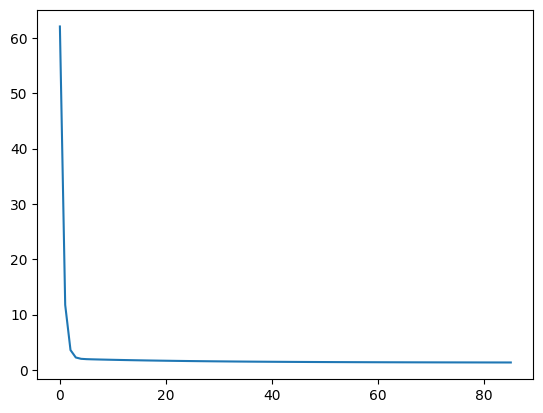

In [9]:
plt.plot(loss_vals)

In [10]:
loss_vals

[np.float64(62.07713504012378),
 np.float64(11.732692783445383),
 np.float64(3.5734361694958996),
 np.float64(2.232107801977941),
 np.float64(1.9933331442681341),
 np.float64(1.933541188890155),
 np.float64(1.903486112658244),
 np.float64(1.8790331274465564),
 np.float64(1.8562568978674852),
 np.float64(1.8344951079302183),
 np.float64(1.813612311342568),
 np.float64(1.7935587156067323),
 np.float64(1.7742992319485935),
 np.float64(1.7558021224703149),
 np.float64(1.7380371849086174),
 np.float64(1.7209754427959185),
 np.float64(1.7045890656994822),
 np.float64(1.6888513223580146),
 np.float64(1.673736538328421),
 np.float64(1.6592200548906728),
 np.float64(1.6452781891778927),
 np.float64(1.631888195688211),
 np.float64(1.6190282292365745),
 np.float64(1.6066773093391378),
 np.float64(1.594815285993932),
 np.float64(1.5834228068107112),
 np.float64(1.572481285439813),
 np.float64(1.5619728712498873),
 np.float64(1.5518804202055734),
 np.float64(1.5421874668978157),
 np.float64(1.53287